In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. 데이터 불러오기
df = pd.read_csv('/kaggle/input/titanic/train.csv')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [280]:
# 성별 숫자로 매핑
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Age 결측 평균으로 채우기
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Embarked 결측 최빈값으로 채우고 OneHot 인코딩
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

# Cabin: 결측은 'M', 첫 글자만 추출 → OneHot 인코딩
df['Cabin'] = df['Cabin'].fillna('M')
df['Cabin_initial'] = df['Cabin'].apply(lambda x: x[0])
cabin_dummies = pd.get_dummies(df['Cabin_initial'], prefix='Cabin')
df = pd.concat([df, cabin_dummies], axis=1)

# Ticket 원-핫 인코딩
ticket_dummies = pd.get_dummies(df['Ticket'], prefix='Ticket')
df = pd.concat([df, ticket_dummies], axis=1)

# 피처 정리
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Cabin_initial', 'Embarked', 'Survived']
X_num = df.drop(columns=drop_cols).astype(float)
y = df['Survived']


✅ Logistic Regression 정확도: 0.8667

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.83      0.83      0.83        36

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



c:\Users\302-1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 600x400 with 0 Axes>

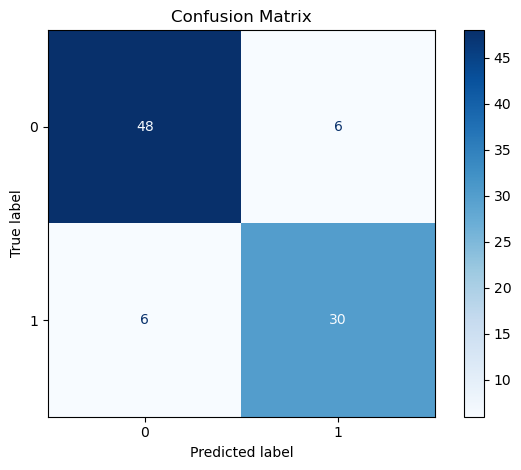

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.1, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 평가
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# 출력
print(f"\n✅ Logistic Regression 정확도: {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 11. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = test_df['PassengerId']

# test 데이터 전처리
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Age'] = test_df['Age'].fillna(df['Age'].mean())  # train 평균
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].mean())

test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
test_df = pd.concat([test_df, embarked_dummies], axis=1)

test_df['Cabin'] = test_df['Cabin'].fillna('M')
test_df['Cabin_initial'] = test_df['Cabin'].apply(lambda x: x[0])
cabin_dummies = pd.get_dummies(test_df['Cabin_initial'], prefix='Cabin')
test_df = pd.concat([test_df, cabin_dummies], axis=1)

ticket_dummies = pd.get_dummies(test_df['Ticket'], prefix='Ticket')
test_df = pd.concat([test_df, ticket_dummies], axis=1)

# 8. 피처 정리 및 열 맞추기
drop_cols = ['Name', 'Ticket', 'Cabin', 'Cabin_initial', 'Embarked']
X_test_final = test_df.drop(columns=drop_cols).astype(float)

# [중요] 학습에 사용된 X_train과 동일한 열 순서로 맞추기
X_test_final = X_test_final.reindex(columns=X_train.columns, fill_value=0)

# 9. 예측
submission_preds = model.predict(X_test_final)

# 10. 제출 파일 생성
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': submission_preds
})
submission.to_csv('/kaggle/working/submission.csv', index=False)
print("📦 submission.csv 저장 완료 ✅")

📦 submission.csv 저장 완료 ✅
